<a href="https://colab.research.google.com/github/KJWesthoff/233LabTaskForce/blob/main/233LabTaskForceTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Poisonous Mushrooms

**Solution**

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

## Grading
---
- Make sure to answer every part in every question.
 - There are 6 equally weighted questions.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean and well commented,
   - and if the functions or answers are too long.

 ## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Question 1:PCA and fraction of total variance
---

1. Do a principal components analysis on the data.
1. Print what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].
1. Show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.
1. You only need to call PCA.fit once.

Notes:
* The pandas DataFrame [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html) function may be helpful.
* You can use `PCA` to produce a PCA analysis.

(8124, 126)
(8124,)
k = 1, variance ratio = 0.168
k = 2, variance ratio = 0.139
k = 3, variance ratio = 0.097
k = 4, variance ratio = 0.063
k = 5, variance ratio = 0.040
k =10, variance ratio = 0.021
k =20, variance ratio = 0.012
k =30, variance ratio = 0.007
k =40, variance ratio = 0.004
k =50, variance ratio = 0.002


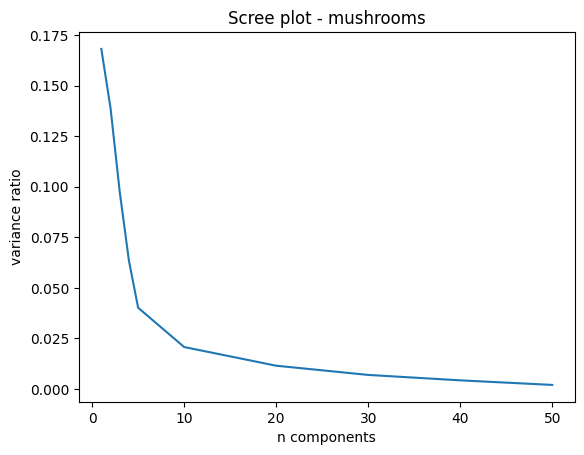

In [5]:
def P1():
    ## STUDENT START ###
    print(X.shape)
    print(Y.shape)
    ks = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    variances = []

    pca = PCA(n_components = 50)
    pca.fit(X)

    for k in ks:
        print("k =%2i, variance ratio = %.3f"   %(k,pca.explained_variance_ratio_[k-1]))
        variances.append(pca.explained_variance_ratio_[k-1])

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(ks,variances)
    ax.set_xlabel("n components")
    ax.set_ylabel("variance ratio")
    ax.set_title("Scree plot - mushrooms")
    ## STUDENT END ###

P1()

### Question 2: PCA for visualization

PCA can be very useful for visualizing data.
1. Project the training data down to 2 dimensions and show as a square scatterplot.
  - Show poisonous examples (labeled 1) in red and non-poisonous examples in green (labeled 0)
  - Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.
* Be sure to add a title, axis labels and a legend to your graph.

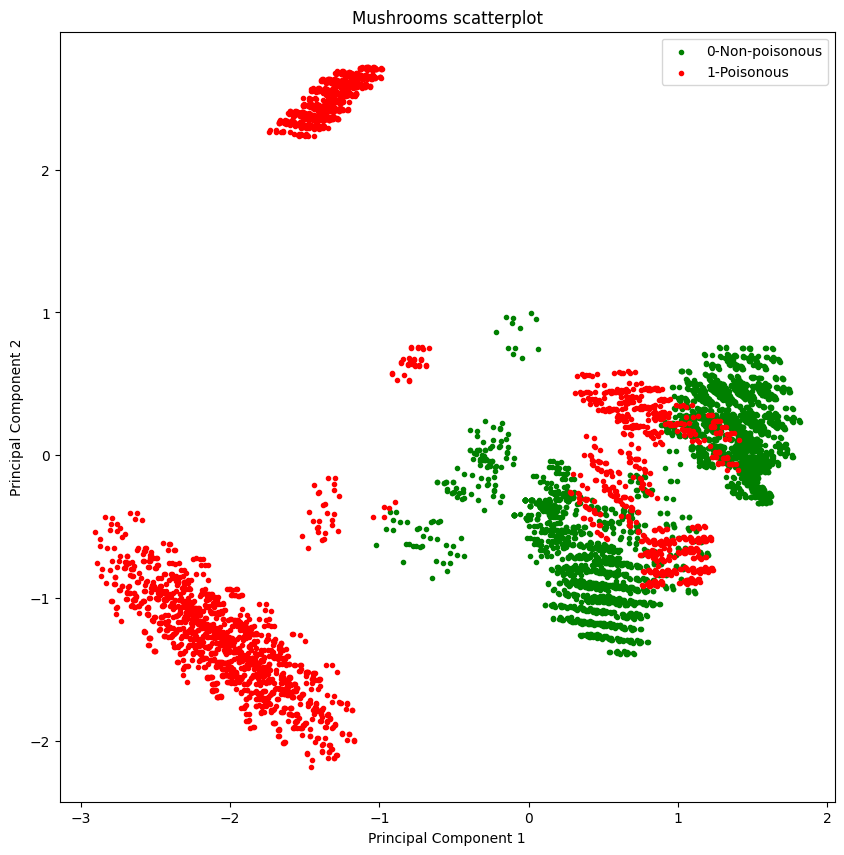

In [6]:
def Q2():
  ### STUDENT START ###

    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(train_data)
    negatives = data_2d[train_labels == 0]
    positives = data_2d[train_labels == 1]

    #print(negatives.shape)
    #print(positives.shape)

    ## Plotting
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    ax.scatter(negatives[:,0], negatives[:,1], c='green', marker = '.', label = '0-Non-poisonous' )
    ax.scatter(positives[:,0], positives[:,1], c='red' , marker = '.' , label = '1-Poisonous' )
    ax.legend()
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('Mushrooms scatterplot')


  ### STUDENT END ###

Q2()

### Question 3: Visualizing GMMs
---

1. Fit a k-means cluster model with 6 clusters over the 2d projected data.
  - As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  
  - For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

(7000, 6)


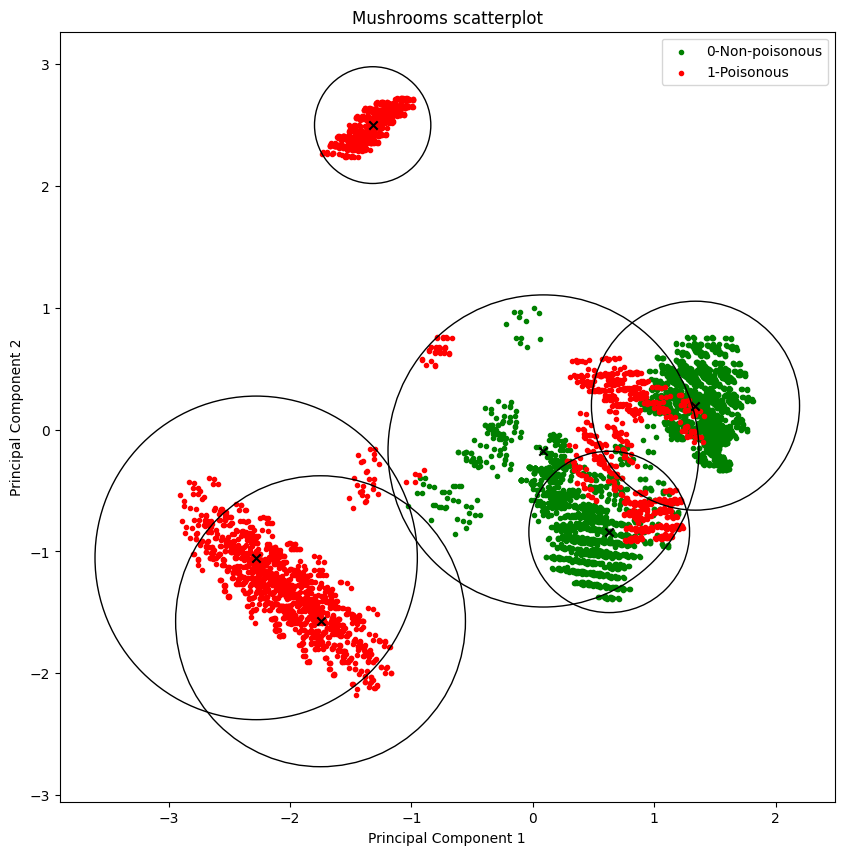

In [7]:
## needed for the circles
import matplotlib.patches as patches
def Q3():
  ### STUDENT START ###

    ## Setup from q2
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(train_data)
    negatives = data_2d[train_labels == 0]
    positives = data_2d[train_labels == 1]



    ## get the cluster distances, and centroids using k-means
    kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto")
    clusters = kmeans.fit_transform(data_2d)
    centers = kmeans.cluster_centers_
    print(clusters.shape)

    ## Dig out the labels to identify which center the distances belong to
    labels = kmeans.labels_
    assigned_centroid_distances = clusters[np.arange(len(data_2d)), labels]

    # Calculate the maximum distance for each label
    max_distances = []
    for i in range(kmeans.n_clusters):
        max_distance = assigned_centroid_distances[labels == i].max()
        max_distances.append(max_distance)

    ## Plotting
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    ax.scatter(negatives[:,0], negatives[:,1], c='green', marker = '.', label = '0-Non-poisonous' )
    ax.scatter(positives[:,0], positives[:,1], c='red' , marker = '.' , label = '1-Poisonous' )
    ax.legend()
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('Mushrooms scatterplot')


    ## add the centers
    ax.scatter(centers[:,0], centers[:,1], c='black', marker='x')

    ## add the circles
    for i,(x, y) in enumerate(centers):
        circle = patches.Circle((x, y), max_distances[i], edgecolor='black', facecolor='none')
        ax.add_patch(circle)


  ### STUDENT END ###

Q3()

### Question 4: Understanding GMMs with Density Plots
---

1. Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data.
  - Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  
  - Show a 4x4 grid of square-shaped plots of the estimated density contours.
    - Each row showing a different number of mixture components.
    - Each column showing a different convariance matrix type.  
1. Be sure to add a title for each plot in the grid to indicate what parameters were used.
1. How are the covariance types 'tied' and 'full' different? How do you see it in the plots?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters.

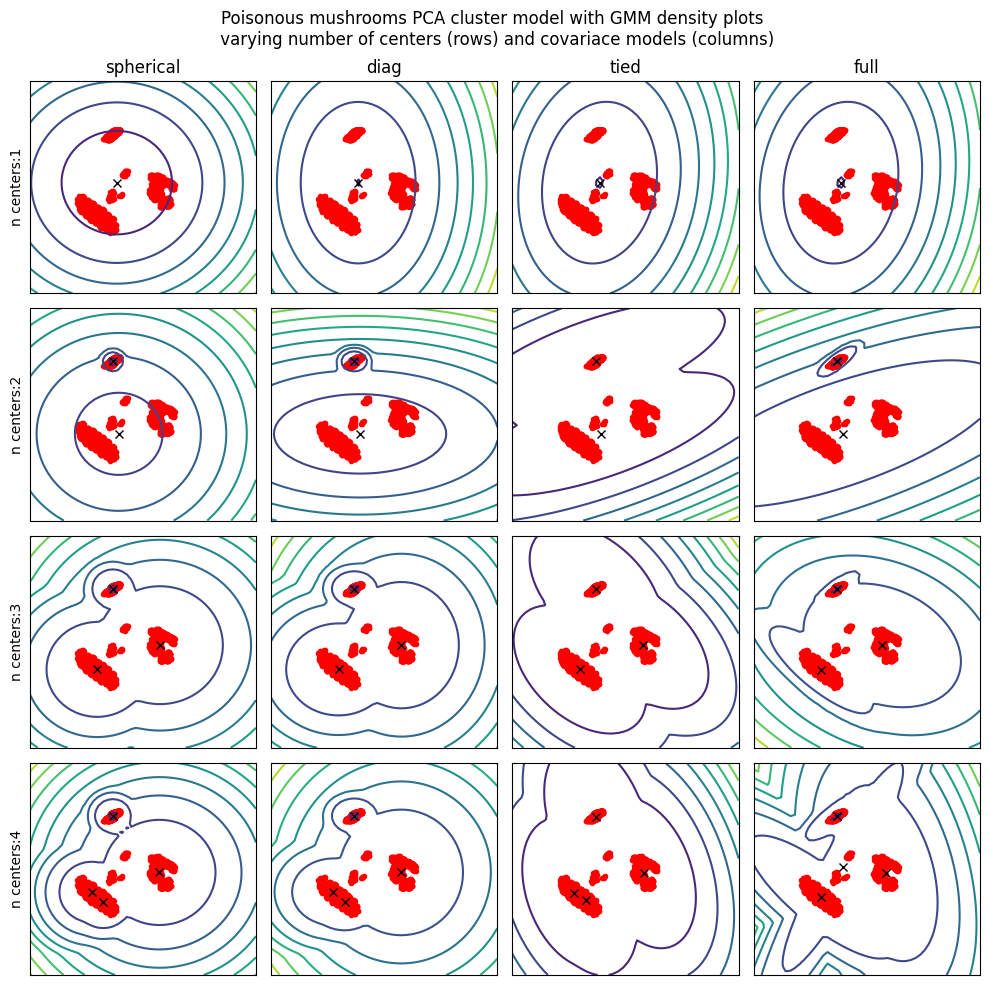

In [8]:
def Q4():
    ### STUDENT START ###

    ## From Q2
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(train_data)
    #negatives = data_2d[train_labels == 0]
    positives = data_2d[train_labels == 1]

    ## params for the GMM
    nx = [1, 2, 3, 4]
    cov = ['spherical', 'diag', 'tied', 'full']

    fig,axs = plt.subplots(nrows=len(nx), ncols=4, figsize=(10, 10), tight_layout=True)

    fig.suptitle('Poisonous mushrooms PCA cluster model with GMM density plots \n varying number of centers (rows) and covariace models (columns)')


    for i,n in enumerate(nx):
        for j,c in enumerate(cov):
            gmm = GaussianMixture(n_components=n, covariance_type=c, random_state=12345)
            gmm.fit(positives)
            means = gmm.means_

            x=np.linspace(-5,5)
            y=np.linspace(-5,5)
            X,Y = np.meshgrid(x,y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            #ax = plt.subplot(4,4, count+1)
            axs[i,j].plot(positives[:,0], positives[:,1], 'r.')
            axs[i,j].contour(X,Y,Z, levels=8)
            axs[i,j].plot(means[:,0], means[:,1], 'kx')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])


            if i == 0:
                axs[i,j].set_title(f"{c}")
            if j == 0:
                axs[i,j].set_ylabel(f"n centers:{n}")


    ### STUDENT END ###

Q4()

Answer: <br>
Just looking at 'tied' vs 'full', the full model does not assign 2 centers to the lower right 'blob' at higher n. <br>
The model behind the contours is dertermined by covariance matrix which can be applied in different ways, the contours are an overlay showing thresholds of the underlying model(s).

- The 'full' model has a covarince matrix for each center which can be of any shape (makes the lower right combined contours look like a Pokemon)
- The  'tied' model has shared covariance matrix (the centers get the same shape with diffrent weight)
- The spherical produces circles in this 2d case and diagonal ellipsoids which are oriented by off diagonal element in the covariance matrix

I found this description on stats.stackexchange [1]:

- Full means the components may independently adopt any position and shape.

- Tied means they have the same shape, but the shape may be anything.

- Diagonal means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.

- Tied Diagonal is a "tied" situation where the contour axes are oriented along the coordinate axes. (I have added this because initially it was how I misinterpreted "diagonal.")

- Spherical is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).


[1]:  (whuber (https://stats.stackexchange.com/users/919/whuber), Different covariance types for Gaussian Mixture Models, URL (version: 2018-02-03): https://stats.stackexchange.com/q/326678)


### Question 5: Using Unsupervised models for classification...?
---

1. Fit two Gaussian mixture models:
  - On your 2d projected training data.
    - Form a subset of all the poisonous examples and fit one GMM (gmm_poison).
    - Form a subset of all the non-poisonous examples and fit another GMM (gmm_nonpoison).
  - Use 4 mixture components and full convariance for each model.  
1. Use the above trained GMMs to classify examples in your test set:
   - For each example in the test set
     - Measure how likely it is to have been "generated" by gmm_poison and gmm_nonpoison (using score_samples).
     - Predict the more likely label.
  - You can use score_samples.
  - You can do this without a for loop which will be more efficient.
1. What is the accuracy of the predictions on the test data? (we expect it to be about 0.95)

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def Q5():
  ### STUDENT START ###
    ## Setup from q2
    pca = PCA(n_components = 2)
    train_data_2d = pca.fit_transform(train_data)
    negatives = train_data_2d[train_labels == 0]
    positives = train_data_2d[train_labels == 1]

    ## Train gaussian mixture models
    gmm_p = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_p.fit(positives)

    gmm_n = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_n.fit(negatives)

    ## Evaluate test data
    test_data_2d = pca.transform(test_data)
    scores_p = gmm_p.score_samples(test_data_2d)
    scores_n = gmm_n.score_samples(test_data_2d)


    ## Check predicitons against both posivie and negative predicions
    preds = []
    for i in range(len(scores_p)):
        if scores_p[i] > scores_n[i]:
            preds.append(1)
        else:
            preds.append(0)

    print("Accuracy: %.3f" %metrics.accuracy_score(np.array(preds),np.array(test_labels)))

  ### STUDENT END ###

Q5()

Accuracy: 0.949


### Question 6: Understanding the GMM parameters
---

1. Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.
1. Print the best configuration and accuracy.
1. Plot a scatter plot of accuracy vs #params.
1. Bonus: Provide a better visualization by showing all four: accuracy, number of parameters, the covariance type and the number of PCA dimensions.



Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* [This spreadsheet](https://docs.google.com/spreadsheets/d/1LTEOU7q_Tgs4bX_3o2ePjDQrTRToZoc1J5XLlaRbmI0/edit?usp=sharing) should help (accessible from your google @berkeley.edu account)

* Spherical - Each GMM component has a mean per dimension, and one variance.
* Diag - Each GMM component has a mean per dimension and a variance for each dimension.
* full - Each GMM component has a mean per dimension and a "full" covariance matrix. Only the covariance matrix is symmetric, so its $[i,j]$ entry would equal to its $[j,i]$ entry.
* tied - Finally, tied has all components share a single covariance matrix. So each GMM component has a mean per dimension but they all share the same 'full' covariance matrix.

In [10]:
from matplotlib.lines import Line2D

def param_count(covariance_type, n_classes, n_components, n_dimensions):
    if covariance_type == 'spherical':
        mean_params = n_components * n_dimensions
        covariance_params = n_components*1
        component_weights = n_components-1
        return n_classes*(mean_params + covariance_params +component_weights)
    if covariance_type == 'diag':
        mean_params = n_components * n_dimensions
        covariance_params = n_components * n_dimensions
        component_weights = n_components-1
        return n_classes*(mean_params + covariance_params +component_weights)
    if covariance_type == 'tied':
        mean_params = n_components * n_dimensions
        covariance_params = (n_components * (n_dimensions-1)/2)
        component_weights = n_components-1
        return n_classes*(mean_params + covariance_params +component_weights)
    if covariance_type == 'full':
        mean_params = n_components * n_dimensions
        covariance_params = n_components * (n_dimensions * (n_dimensions-1)/2)
        component_weights = n_components-1
        return n_classes*(mean_params + covariance_params +component_weights)

    ## if none of the if's execute:
    raise Exception(f"Unknown Covariance type: {covariance_type}")



def Q6():
  ### STUDENT START ###
    nc = 2

    ## params for PCA
    n_of_dimentions = range(1,50)

    ## params for the GMM
    n_of_components = range(1,50)
    cov_types = ['spherical', 'diag', 'tied', 'full']



    results = []
    for nd in n_of_dimentions: # dimensions
        for i,nc in enumerate(n_of_components):
            for j,ct in enumerate(cov_types):

                pc = param_count(ct, 2, nc, nd)

                ## skip if parameter count is > 50
                if pc > 50:
                    continue

                ## Do PCA modelling - cluster the data
                pca = PCA(n_components = nd)
                train_data_cluster = pca.fit_transform(train_data)
                negatives = train_data_cluster[train_labels == 0]
                positives = train_data_cluster[train_labels == 1]

                ## Train gaussian mixture models
                gmm_p = GaussianMixture(n_components=nc, covariance_type=ct, random_state=12345)
                gmm_p.fit(positives)

                gmm_n = GaussianMixture(n_components=nc, covariance_type=ct, random_state=12345)
                gmm_n.fit(negatives)

                ## Evaluate test data
                test_data_cluster = pca.transform(test_data)
                scores_p = gmm_p.score_samples(test_data_cluster)
                scores_n = gmm_n.score_samples(test_data_cluster)

                ## Check predicitons against both posivie and negative predicions

                preds = [1 if scores_p[i] > scores_n[i] else 0 for i in range(len(scores_p))] #imporved from above
                accuracy = metrics.accuracy_score(np.array(preds),np.array(test_labels))

                ## Collect results
                res = {
                    "nd":nd,
                    "nc":nc,
                    "ct":ct,
                    "pc":pc,
                    "accuracy":accuracy
                }

                results.append(res)

    return results
  ### STUDENT END ###

resdict = Q6()

Accuracy: 0.976 with 46 parameters - PCA dims: 5, Gaussian - n components:3 covariance type:tied 
Accuracy: 0.972 with 50 parameters - PCA dims:17, Gaussian - n components:1 covariance type:tied 
Accuracy: 0.971 with 47 parameters - PCA dims:16, Gaussian - n components:1 covariance type:tied 
{'nd': 7, 'nc': 1, 'ct': 'tied', 'pc': 20.0, 'accuracy': 0.9653024911032029}


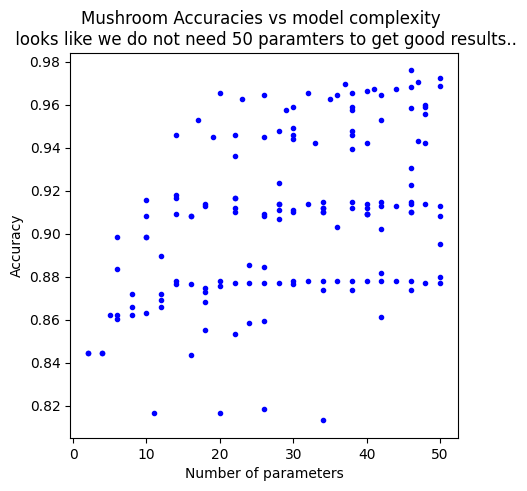

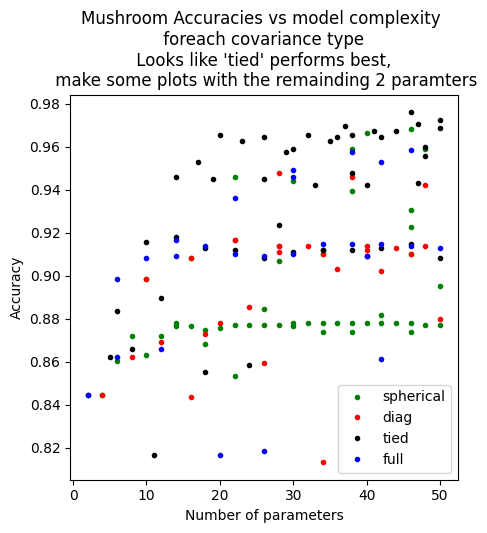

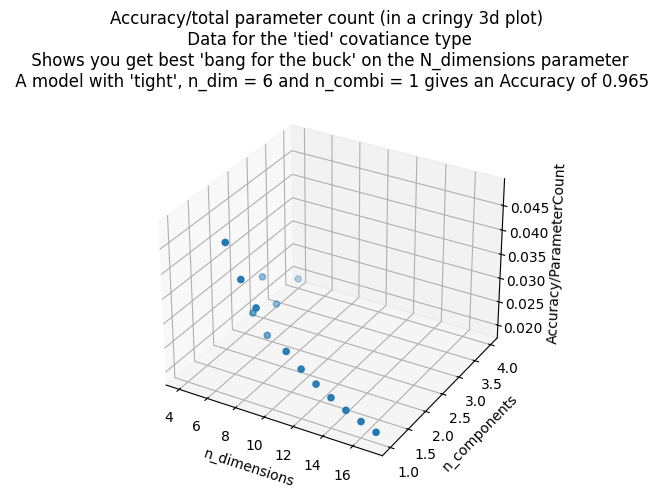

In [11]:

results_sorted = sorted(resdict, key=lambda item: item['accuracy'])

## Top 3 best combos:
for res in results_sorted[:-4:-1]:
    print(f"Accuracy: {res['accuracy']:.3f} with {res['pc']:.0f} parameters - PCA dims:{res['nd']:2.0f}, Gaussian - n components:{res['nc']} covariance type:{res['ct']} ")

## Plotting

## Scatterplot of accuracy vs no of paramters used
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot([r['pc'] for r in resdict], [r['accuracy'] for r in resdict], 'b.')
ax.set_title('Mushroom Accuracies vs model complexity \n looks like we do not need 50 paramters to get good results..')
ax.set_xlabel("Number of parameters")
ax.set_ylabel("Accuracy")

## looks like we do not need 50 paramters to get good results..
## Better plot to see what works

## Scatterplot of accuracy vs no of paramters
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()


cov_types = ['spherical', 'diag', 'tied', 'full']
annot = ['g.', 'r.','k.', 'b.']

for i,cv in enumerate(['spherical', 'diag', 'tied', 'full']):
    ax.plot([r['pc'] for r in filter(lambda x: x['ct']==cv, resdict)], [r['accuracy'] for r in filter(lambda x: x['ct']==cv, resdict)], annot[i], label = cv)
ax.set_title("Mushroom Accuracies vs model complexity \n foreach covariance type \n Looks like 'tied' performs best, \n make some plots with the remainding 2 paramters")
ax.set_xlabel("Number of parameters")
ax.set_ylabel("Accuracy")
ax.legend()

## Looks like 'tied' performs best, make some plots with the remainding 2 paramters'
tied_data = [r for r in filter(lambda x: x['ct']=='tied' and x['accuracy']>0.96 , resdict)]

## calculate accuracy/iterations and contour plot that vs n_dimensions and n_components

x = np.array([r['nd'] for r in tied_data])
y = np.array([r['nc'] for r in tied_data])
z =  np.array([r['accuracy']/r['pc'] for r in tied_data])


## contour plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.set_xlabel("n_dimensions")
ax.set_ylabel("n_components")
ax.set_zlabel("Accuracy/ParameterCount")
ax.set_title("Accuracy/total parameter count (in a cringy 3d plot) \n Data for the 'tied' covatiance type \n Shows you get best 'bang for the buck' on the N_dimensions parameter \n A model with 'tight', n_dim = 6 and n_combi = 1 gives an Accuracy of 0.965")


## find a result with 'tied', n_dimensions = 2 and n_components = 2
filtered = filter(lambda x: x['ct']=='tied' and x['nd']==7 and x['nc']==1 , resdict)
for s in filtered:
    print(s)


